In [1]:
import pandas as pd
import numpy as np
import re
# loading the sources files
from IPython.core.display import display, HTML
tp=pd.read_csv("20231211-Filtered-TPs.csv")
cim=pd.read_csv("20231130-CIM-report.csv")
sp1=pd.read_csv("20231211-SP1.csv")
#For future reference
leninitp=len(tp)
leninicim=len(cim)
leninisp1=len(sp1)



/tmp/ipykernel_1527/2677971196.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#Read third party, filter on AC division
tp.columns
tp.head()
tp[['TDPARTY_NAME','TDPARTY_ADDRESS','TDPARTY_POSTAL_CODE',"TDPARTY_CITY","TDPARTY_COUNTRY", 'TDPARTY_PROGRAM']]
# Filtrage uniquement sur les third party AC
display(HTML('<h1>Stats</h1>'))
display(HTML('<b>Third parties in licenses # : </b>'+str(leninitp)))
display(HTML('<b>Supplier in CIM # : </b>'+str(leninicim)))
display(HTML('<b>Supplier in SP1 # : </b>'+str(leninisp1)))


In [3]:
# The country file is used to provide a mapping to all country representation (language and typo). 
countries=pd.read_csv("countries.csv",index_col=0)
# Select the countries when there is a need to substitute
replacements=countries[countries.originalcountry!=countries.tobename]
# Convert the mapping adding some pattern to avoid unwanted replacement 
# (To avoid Airbus is replaced by Airbus Airbusa because us represent the coutry usa)
#replacements.originalcountry="[\\s^]"+replacements.originalcountry+"[\\s$]"
replacements.originalcountry=replacements.originalcountry
replacements.tobename=" "+replacements.tobename
# Replacement of countries to unifed representation (independant from tongue and typo)
replacements=replacements.set_index('originalcountry')
replacements.tobename=replacements.tobename.replace("\s","",regex=True)
# Converting to dict
replacements=replacements.tobename.to_dict()

# Create a single pattern doing all replacement to apply once on every line (for efficency)
rep = dict((re.escape(k), v) for k, v in replacements.items()) 
pattern = re.compile("|".join(rep.keys()))


/tmp/ipykernel_1527/1498682475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacements.originalcountry=replacements.originalcountry
/tmp/ipykernel_1527/1498682475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacements.tobename=" "+replacements.tobename


In [4]:
# Function to clean the name of the commany and creating a column for representation of name + country
def cleanCountryAndName(df):
    dftoreplace=df
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ssa[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ssas[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ss\.a\.s[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ssud ouest[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ssud-ouest[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sfrance[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*french[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*toulouse[\s]*")),"france")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sltd[\s]*")),"united kingdom")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\slimited[\s]*")),"united kingdom")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\suk[\s]*")),"united kingdom")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*united kingdom[\s]*")),"united kingdom")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ssl[\s]*")),"spain")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ss\.l[\s]*")),"spain")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\ss\.l\.[\s]*")),"spain")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sslu[\s]*")),"spain")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*spanish[\s]*")),"spain")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*turkish[\s]*")),"turkey")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*german[\s]*")),"germany")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sgmbh[\s]*")),"germany")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sdeutschland[\s]*")),"germany")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sgermany[\s]*")),"germany")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "\\sbelgium[\s]*")),"belgium")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*belgian[\s]*")),"belgium")
    dftoreplace.CountryCleansed=dftoreplace.CountryCleansed.mask((dftoreplace.CountryCleansed.isna()) & (dftoreplace.NameCleansed.str.contains( "[\\s]*luxembourg[\s]*")),"luxembourg")
    #Remove unrelevant terms from company name 
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\ssas[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\ssa[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\ssas[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\ssas[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\ssas[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\stoulouse[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\sltd[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\slimited[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\sprivate[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("[\\s]*united kingdom[\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("[\\s]*uk[\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\sdeutschland[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("[\\s]*luxembourg[\\s]*"," ",regex=True)
    dftoreplace.NameCleansed=dftoreplace.NameCleansed.str.replace("\\sgmbh[\\s]*"," ",regex=True)
    dftoreplace["CountryCleansed"].fillna("",inplace=True)
    dftoreplace["CountryCleansed"]=dftoreplace["CountryCleansed"].apply(lambda x:pattern.sub(lambda m: rep[re.escape(m.group(0))], x))
    dftoreplace["CountryCleansed"].replace(" ","",regex=True,inplace=True)
    dftoreplace["CountryCleansed"].replace("-","",regex=True,inplace=True)
    dftoreplace["NameCountryCleansed"]=dftoreplace.NameCleansed+ " " +dftoreplace["CountryCleansed"]
    return dftoreplace

In [5]:
# We create a cleansed name in the TP referential referential

tp["index"]=tp.index
#tp=tp[tp.LICENSE_DIVISION=="AC"]
print("Tp with no name",tp[tp.TDPARTY_NAME.isna()])
print("Tp with no country")
print(tp[tp.TDPARTY_COUNTRY.isna()]["TDPARTY_NAME"])
tp=tp[~tp.TDPARTY_NAME.isna()]
#Filtrage sur la division
tp.to_csv("tp-cleansed.csv")
tp["NameCleansed"]=tp.TDPARTY_NAME.str.lower()
tp["CountryCleansed"]=tp.TDPARTY_COUNTRY.str.lower()
tp["usablename"]=True


display(HTML('<b>Unique third party name #:</b>'+str(len(tp["NameCleansed"].unique()))))
lenfintp=len(tp)
display(HTML('<b>Removed third party after cleansing #:</b>'+str(lenfintp-leninitp)))
tp.head()


tp=cleanCountryAndName(tp)

tp.loc[tp.CountryCleansed.isna(),"usablename"]=False

tp.NameCountryCleansed


Tp with no name Empty DataFrame
Columns: [FILENAME, LICENSE_NBR, TDPARTY_NAME, TDPARTY_ROLE, TDPARTY_COUNTRY, TDPARTY_ADDRESS, TDPARTY_ARP_ID, ARP_needreview, TDPARTY_FLAG, LICENSE_DIVISION, LICENSE_PROGRAM, TDPARTY_CITY, TDPARTY_POSTAL_CODE, TDPARTY_PROGRAM, index]
Index: []
Tp with no country
20                 ALTRAN Sud Ouest
86                 ALTRAN Sud Ouest
168                 FLIR System INC
301           Airbus Operations SAS
611                      Airbus SAS
                   ...             
8284                     AIRBUS SAS
8451      AIRBUS DEFENSE & SPACE SA
8534    AIRBUS DEFENCE AND SPACE SA
8535    AIRBUS DEFENCE AND SPACE SA
8582                     AIRBUS SAS
Name: TDPARTY_NAME, Length: 106, dtype: object


0                                  entserv  unitedkingdom
1                                cti verwaltungs  germany
2       liebherr-aerospace c/o bollore logistics li  f...
3          esg elektroniksystem-und-logistik-gmbh germany
4                                           airbus france
                              ...                        
8609                    bae systems vereinigteskönigreich
8610                       airbus operations  deutschland
8611    ministry of defence udi arabien militärische d...
8612                 wincanton plc vereinigteskoenigreich
8613                           airbus operations  germany
Name: NameCountryCleansed, Length: 8614, dtype: object

In [6]:
# We create a cleansed name in the CIM referential
cim.columns
cim.head()
cim["index"]=cim.index
cim[['Name','Country Name','Street',"Zip code",'City','Country (Address)']]
cim=cim[~cim.Name.isna()]
cim["NameCleansed"]=cim.Name.str.lower()
cim["CountryCleansed"]=cim["Country Name"].str.lower()

cim=cleanCountryAndName(cim)

print("Nombre de supplier name dans cim",len(cim["NameCleansed"].unique()))

cim.NameCountryCleansed


Nombre de supplier name dans cim 1829


0                 nortel networks germany & co kg germany
1             nortel network germany verwaltungs  germany
2       australian aerospace military maintenance pty ...
3                eurocopter international belgium belgium
4       acma, gesellschaft für flugzeuggestützte trage...
                              ...                        
1878    molim mobilien verwaltungsgesellschaft mbh & c...
1879                        eads - cassidian hq g germany
1880                        cassidian - hq  unitedkingdom
1881                         cassidian - hq france france
1882          euro-art advanced radar technology  germany
Name: NameCountryCleansed, Length: 1883, dtype: object

In [7]:
#Nettoyage des supplier name
sp1.columns
sp1["index"]=sp1.index
sp1=sp1[~sp1.supp_name.isna()]

sp1["NameCleansed"]=sp1.supp_name.str.lower()
sp1["CountryCleansed"]=sp1.supp_country_name_en.str.lower()
print("Nombre de supplier name dans sp1",len(sp1["NameCleansed"].unique()))
sp1=cleanCountryAndName(sp1)

sp1.NameCountryCleansed

Nombre de supplier name dans sp1 42930


0                 atis iberica derichebourg spain
1                                      jvd france
2         wolf gustav seil und drahtwerke germany
3                                 caillau  france
4        gardner aerospace - derby  unitedkingdom
                           ...                   
49046     aertec industrial engineering slu spain
49047           alestis tecnobahia montajes spain
49048                ultra precision  switzerland
49049                     drosg & co. switzerland
49050                              sapelem france
Name: NameCountryCleansed, Length: 49051, dtype: object

In [8]:
corpusname=pd.concat([cim.NameCountryCleansed,tp.NameCountryCleansed,sp1.NameCountryCleansed])
corpusname[0]




0    nortel networks germany & co kg germany
0                     entserv  unitedkingdom
0            atis iberica derichebourg spain
Name: NameCountryCleansed, dtype: object

In [9]:
#Based on the corpus of name we create a matrix of association
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(strip_accents="ascii")
features = vectorizer.fit(corpusname)

tpnamevect=vectorizer.transform(tp.NameCountryCleansed)
cimnamevect=vectorizer.transform(cim.NameCountryCleansed)
sp1namevect=vectorizer.transform(sp1.NameCountryCleansed)

# Renormalize so that if country is present twice in name and in country, it is counted only once

tpnamevect=(tpnamevect>0)*1
cimnamevect=(cimnamevect>0)*1
sp1namevect=(sp1namevect>0)*1



In [10]:
tp.NameCountryCleansed[14]

'capgemini india  india'

In [11]:
# We compute a list giving if two name are similar
from sklearn.metrics.pairwise import cosine_similarity


similaritycim=cosine_similarity(tpnamevect,cimnamevect)
similaritysp1=cosine_similarity(tpnamevect,sp1namevect)


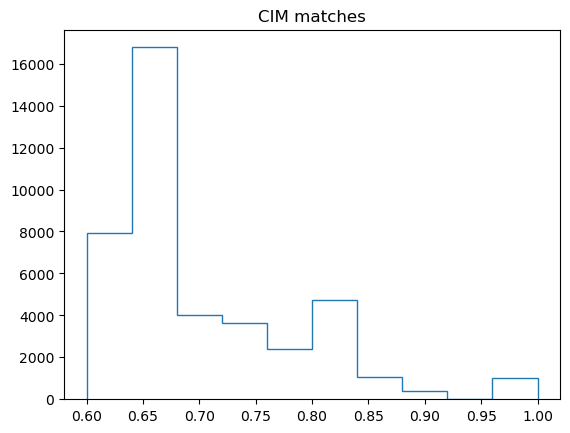

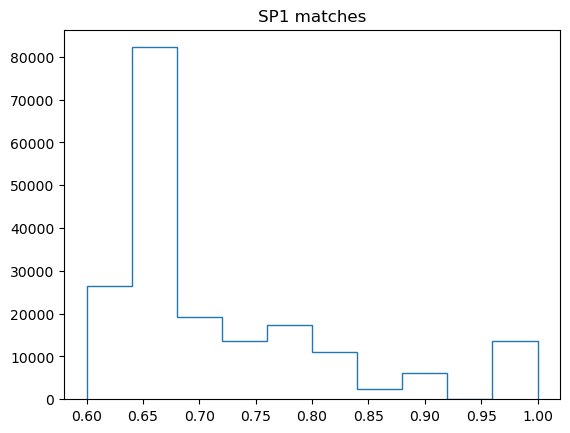

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

counts, bins =np.histogram(similaritycim,range=[.6,1])
plt.stairs(counts, bins)
plt.title("CIM matches")
plt.show()

counts, bins =np.histogram(similaritysp1,range=[.6,1])
plt.stairs(counts, bins)
plt.title("SP1 matches")
plt.show()
#hist

In [25]:
similarnamecim=np.where(similaritycim>.9)
similarnamesp1=np.where(similaritysp1>.9)
#print(similarnamecim)

#tp.NameCountryCleansed[14]
#cim.NameCountryCleansed[77]

print("Exploration de CIM")
for i in range (10,100):
#    print(tp.NameCountryCleansed.iloc[similarnamecim[0][i]])
    print(tp.iloc[similarnamecim[0][i],2])
#    print(cim.NameCountryCleansed.iloc[similarnamecim[1][i]])
    print(cim.iloc[similarnamecim[1][i],3])
    print("----------")

print("===========")

print("Exploration de SP1")
for i in range (10,30):
    print(tp.NameCountryCleansed.iloc[similarnamesp1[0][i]])
#    print(tp.iloc[similarnamesp1[0][i],2])
#    print(sp1.NameCountryCleansed.iloc[similarnamesp1[1][i]])
    print(sp1.iloc[similarnamesp1[1][i],1])
    print("----------")



from scipy import spatial
np.where((tpnamevect.getrow(14).toarray()>0))
#cimnamevect.getrow(77).toarray()[0]

##spatial.distance.cosine(cimnamevect.getrow(14).toarray()[0], tpnamevect.getrow(77).toarray()[0])

features.inverse_transform(tpnamevect.getrow(14))
features.inverse_transform(cimnamevect.getrow(77))
np.where(tpnamevect.getrow(14).toarray()>0)

Exploration de CIM
AIRBUS OPERATIONS LTD
Airbus Operations Limited
----------
HENSOLDT OPTRONICS GMBH
Hensoldt Optronics GmbH
----------
PREMIUM AEROTEC GMBH
Premium AEROTEC GmbH
----------
AIRBUS OPERATIONS GMBH
Airbus Operations GmbH
----------
Airbus Defence and Space Limited
Airbus Defence and Space (Newport)
----------
Airbus Defence and Space Limited
AIRBUS Defence and Space Limited
----------
Hensoldt Sensors GmbH
Hensoldt Sensors GmbH
----------
Stelia Aerospace S.A.S.
Stelia Aerospace S.A.S. Deutschland
----------
AIRBUS DEFENCE AND SPACE GMBH
Airbus Defence and Space GmbH
----------
AIRBUS OPERATIONS SL
Airbus Operations SL
----------
AIRBUS OPERATIONS LTD
Airbus Operations Limited
----------
AIRBUS OPERATIONS GMBH
Airbus Operations GmbH
----------
CIMPA LIMITED
Cimpa Limited
----------
A400M Training Services Limited
A400M Training Services Limited
----------
HENSOLDT SENSORS GMBH
Hensoldt Sensors GmbH
----------
AIRBUS
AIRBUS SAS
----------
AIRBUS
Airbus UK Toulouse SAS
---

(array([0, 0]), array([ 5633, 15642]))

In [14]:
similarname=np.where(similarity>.8)

tp["idcim"]=""
indexcim=tp.columns.get_loc("idcim")
indexcim
for i in range(len(similarname[0])):
    tp.iloc[similarname[1][i],indexcim]=tp.iloc[similarname[1][i],indexcim]+str(similarname[0][i])+","
    print("id: ",str(similarname[1][i]),", name: ",tp.iloc[similarname[1][i],2],"/id",similarname[0][i]," name: ",cim.iloc[similarname[0][i],3])

suppliersansrefdanscim=tp[tp.idcim==""]
suppliersansrefdanscim=suppliersansrefdanscim[~suppliersansrefdanscim.NameCleansed.str.contains("armee")]
suppliersansrefdanscim=suppliersansrefdanscim[~suppliersansrefdanscim.NameCleansed.str.contains("armée")]
suppliersansrefdanscim=suppliersansrefdanscim[~suppliersansrefdanscim.NameCleansed.str.contains("army")]
suppliersansrefdanscim.TDPARTY_NAME.to_csv("suppliersansrefdanscim.csv")
#len(tp[tp.idcim==""])/len(tp)

##cim.loc[1478]

NameError: name 'similarity' is not defined

In [ ]:
len(tp[tp.idcim==""].TDPARTY_NAME.unique())
pd.DataFrame(tp[tp.idcim==""].TDPARTY_NAME.unique()).to_csv("Supplier-AC-not-found.csv")

In [ ]:
tp["TDPARTY_FLAG_Cleansed"]=tp.TDPARTY_FLAG.str.lower()
a=tp[tp.idcim==""].TDPARTY_FLAG_Cleansed.value_counts()
b=tp.TDPARTY_FLAG_Cleansed.value_counts()
m=b.to_frame().join(a.to_frame(),lsuffix='all')
m[0:10].plot.bar()